# Семинар 3. Нейронные сети. Tensorflow и Keras

### Фреймворки:

- <strong>TensorFlow*</strong> — открытая программная библиотека для построения и обучения нейронных сетей, разработанная компанией Google. Основной API для работы с библиотекой реализован для Python. 

    Также существуют реализации для: R, C Sharp, C++, Haskell, Java, Go, Swift.

    https://www.tensorflow.org


 - <strong>Keras**</strong>  — открытая программная библиотека, представляющая из себя надстройку над библиоткеми Deeplearning4j, TensorFlow и Theano. Является скорее интерфейсом над указанными библиотеками и предоставляет высокоуровневый, более интуитивный набор абстракций, который делает простым формирование нейронных сетей.

    Разработана инженером Google – Франсуа Шолле

    https://keras.io


<strong>Установка</strong>: 
- pip install tensorflow
- pip install keras

_____

<blockquote>
* https://ru.wikipedia.org/wiki/TensorFlow  | **https://ru.wikipedia.org/wiki/Keras 
</blockquote>

### План семинара:

#### > Основы Keras:
1. Инициализация модели и построение слоев нейронной сети
2. Назначение гиперпараметров сети
3. Обучение и тестирование нейронной сети
4. Сохранение и вызов нейронной сети из файла
5. Редактирование модели: выделение и встраивание слоев, фиксация весов

#### > Построение и обучение пройденных моделей:
1. Многослойный перцептрон
2. Автоассоциативная сеть

In [5]:
import tensorflow as tf
from tensorflow import keras

## Основы Keras

### 1. Инициализация модели и построение слоев нейронной сети

In [27]:
from keras import layers

#вариант 1
model= keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="sigmoid", name="layer1"),
        layers.Dense(3, activation="sigmoid", name="layer2"),
        layers.Dense(4, name="layer3"),
    ],
    name="MLP_1"
)

model.build() #собираем модель (если производится обучение, то build не нужно)
model.summary() #вывод таблицы архитектуры

Model: "MLP_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 10        
_________________________________________________________________
layer2 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer3 (Dense)               (None, 4)                 16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [30]:
#вариант 2
model = keras.Sequential(name="MLP_2")

model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="sigmoid", name="layer1"))
model.add(layers.Dense(3, activation="sigmoid", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

model.build()
model.summary()

Model: "MLP_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 10        
_________________________________________________________________
layer2 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer3 (Dense)               (None, 4)                 16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


### 2. Назначение гиперпараметров сети

In [38]:
from keras import optimizers
from keras import losses
from keras import metrics

#оптимизатор (SGD - стохастический градиентный спуск)
opt = keras.optimizers.SGD(learning_rate=0.3)
# learning_rate - скорость обучения

#функция потерь (среднее кваратическое ошибки)
f_loss = losses.MeanSquaredError()

#НОВОЕ: метрика - гиперпараметр валидации (accuracy - достигнутая точность)
        #под валидацией понимается тестирование в процессе обучения
met = ['accuracy']


model.compile(
    optimizer=opt,  
    loss=f_loss,  
    metrics=met, 
)

### 3. Обучение и тестирование нейронной сети

In [ ]:
#Обучение

#обучающее множество (тут не объявлено)
x_train = ...
y_train = ...

#валидационное множество (можно использовать тестовое)
x_test = ...
y_test = ...

#частота валидации
batch_size = 64  #раз в 64 строчки обучающего множества

#количество эпох обучения
ep = 100
ep_start = 0 #эпоха, с которой начинается обучения (если дообучать обученную сеть)


model.fit(
    x=x_train
    y=y_train
    batch_size=batch_size,
    epochs=ep,
    validation_data=(x_test,y_test)
    initial_epoch=ep_start
    steps_per_epoch=None, #если необходимо обучать не по всему обучающему множеству
)

In [ ]:
#Тестирование
model.evaluate(x=x_test, y=y_test)

#Использование обученной нейронной сети
y=model.predict(x)

### 4. Сохранение и вызов нейронной сети из файла

In [ ]:
#Сохранение обученной нейронной сети
model.save("models/my_model.h5") #сохраняет в формат h5
model.save("models/my_model") #сохраняет в виде папки

#Вызов нейронной сети из файла
model=tf.keras.models.load_model("models/my_model.h5")
model=tf.keras.models.load_model("models/my_model")

#вохзможно в Windows работает только .h5 (по крайней мере у меня)

### 5. Редактирование модели: выделение и встраивание слоев, фиксация весов

In [49]:
from keras.models import Model

#Выделение слоев

#выделение первых 2-х слоев в новую модель
model_2 = Model(inputs=model.input, outputs=model.layers[1].output, name="MLP_2")

#фиксирование весов (non-trainable)
for layer in model_p1.layers:
    layer.trainable = False

model_2.summary()

Model: "MLP_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 2)                 10        
_________________________________________________________________
layer2 (Dense)               (None, 3)                 9         
Total params: 19
Trainable params: 0
Non-trainable params: 19
_________________________________________________________________


In [65]:
#Добавление новых слоев
p2=layers.Dense(24, activation="sigmoid", name="layer3_new")(model_2.output)
p2=layers.Dense(8, activation="sigmoid", name="layer4_new")(p2)
p2=layers.Dense(1, name="layer5_new")(p2)

#пересобираем модель с новым слоем
model_3=Model(inputs=[model_2.input], outputs=[p2], name="MLP_3")

model_3.summary()

Model: "MLP_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
layer1 (Dense)               (None, 2)                 10        
_________________________________________________________________
layer2 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer3_new (Dense)           (None, 24)                96        
_________________________________________________________________
layer4_new (Dense)           (None, 8)                 200       
_________________________________________________________________
layer5_new (Dense)           (None, 1)                 9         
Total params: 324
Trainable params: 305
Non-trainable params: 19
______________________________________________________________

## Построение и обучение пройденных моделей:

### 1. Многослойный перцептрон

источник данных: www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv('titanic_data.csv')
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,0.3,1,0.22,0.1,0.0,0.007250
1,2,1,0.1,0,0.38,0.1,0.0,0.071283
2,3,1,0.3,0,0.26,0.0,0.0,0.007925
3,4,1,0.1,0,0.35,0.1,0.0,0.053100
4,5,0,0.3,1,0.35,0.0,0.0,0.008050
...,...,...,...,...,...,...,...,...
709,886,0,0.3,0,0.39,0.0,0.5,0.029125
710,887,0,0.2,1,0.27,0.0,0.0,0.013000
711,888,1,0.1,0,0.19,0.0,0.0,0.030000
712,890,1,0.1,1,0.26,0.0,0.0,0.030000


In [2]:
x_train=data[["Pclass","Sex","Age","SibSp","Parch","Fare"]].values
y_train=data[["Survived"]].values

x_train, y_train

(array([[0.3      , 1.       , 0.22     , 0.1      , 0.       , 0.00725  ],
        [0.1      , 0.       , 0.38     , 0.1      , 0.       , 0.0712833],
        [0.3      , 0.       , 0.26     , 0.       , 0.       , 0.007925 ],
        ...,
        [0.1      , 0.       , 0.19     , 0.       , 0.       , 0.03     ],
        [0.1      , 1.       , 0.26     , 0.       , 0.       , 0.03     ],
        [0.3      , 1.       , 0.32     , 0.       , 0.       , 0.00775  ]]),
 array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [

In [3]:
x_test=x_train[600:714]
y_test=y_train[600:714]
x_train=x_train[0:600]
y_train=y_train[0:600]
x_test.shape, y_test.shape

((114, 6), (114, 1))

In [49]:
# создем модель
from keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(6,)),
        layers.Dense(5, activation="relu", name="layer1"),
        layers.Dense(2, activation="relu", name="layer2"),
        layers.Dense(1, activation="sigmoid", name="layer3"),
    ],
    name="MLP_titanic"
)

model.build()
model.summary()

Model: "MLP_titanic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 5)                 35        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 12        
_________________________________________________________________
layer3 (Dense)               (None, 1)                 3         
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [50]:
from keras import optimizers
from keras import losses
from keras import metrics

#оптимизатор (SGD - стохастический градиентный спуск)
opt = keras.optimizers.SGD(learning_rate=0.3)
# learning_rate - скорость обучения

#функция потерь
f_loss = losses.BinaryCrossentropy()

#НОВОЕ: метрика - гиперпараметр валидации (accuracy - достигнутая точность)
        #под валидацией понимается тестирование в процессе обучения
met = ['accuracy']


model.compile(
    optimizer=opt,  
    loss=f_loss,  
    metrics=met, 
)

In [51]:
#Обучаем сеть

model.fit(
    x=x_train,
    y=y_train,
    batch_size=10,
    epochs=400,
    validation_data=(x_test,y_test),
)

Epoch 1/400
72/72 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5798 - val_loss: 0.6694 - val_accuracy: 0.5965
Epoch 2/400
72/72 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.5938 - val_loss: 0.6647 - val_accuracy: 0.5965
Epoch 3/400
72/72 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.6022 - val_loss: 0.6519 - val_accuracy: 0.5965
Epoch 4/400
72/72 [==============================] - 0s 1ms/step - loss: 0.6505 - accuracy: 0.6022 - val_loss: 0.6332 - val_accuracy: 0.5965
Epoch 5/400
72/72 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.6359 - val_loss: 0.6034 - val_accuracy: 0.7281
Epoch 6/400
72/72 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.7493 - val_loss: 0.5654 - val_accuracy: 0.7982
Epoch 7/400
72/72 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.7773 - val_loss: 0.5368 - val_accuracy: 0.7982
Epoch 8/400
7

Epoch 59/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8067 - val_loss: 0.4876 - val_accuracy: 0.7719
Epoch 60/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.8067 - val_loss: 0.4106 - val_accuracy: 0.7982
Epoch 61/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8095 - val_loss: 0.4233 - val_accuracy: 0.7982
Epoch 62/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8067 - val_loss: 0.4090 - val_accuracy: 0.8333
Epoch 63/400
72/72 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8025 - val_loss: 0.4112 - val_accuracy: 0.8246
Epoch 64/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8081 - val_loss: 0.4237 - val_accuracy: 0.7982
Epoch 65/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8053 - val_loss: 0.4518 - val_accuracy: 0.7895
Epoch 

72/72 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8109 - val_loss: 0.3747 - val_accuracy: 0.8421
Epoch 174/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8165 - val_loss: 0.3886 - val_accuracy: 0.8333
Epoch 175/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8193 - val_loss: 0.4073 - val_accuracy: 0.8070
Epoch 176/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8193 - val_loss: 0.3748 - val_accuracy: 0.8509
Epoch 177/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8193 - val_loss: 0.3934 - val_accuracy: 0.8333
Epoch 178/400
72/72 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8165 - val_loss: 0.5191 - val_accuracy: 0.7719
Epoch 179/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8151 - val_loss: 0.3638 - val_accuracy: 0.8421
Epoch 180/400

72/72 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8249 - val_loss: 0.3613 - val_accuracy: 0.8684
Epoch 288/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8221 - val_loss: 0.4063 - val_accuracy: 0.8246
Epoch 289/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8179 - val_loss: 0.3501 - val_accuracy: 0.8684
Epoch 290/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8137 - val_loss: 0.3560 - val_accuracy: 0.8509
Epoch 291/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8151 - val_loss: 0.3727 - val_accuracy: 0.8333
Epoch 292/400
72/72 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8291 - val_loss: 0.3713 - val_accuracy: 0.8509
Epoch 293/400
72/72 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8249 - val_loss: 0.3506 - val_accuracy: 0.8596
Epoch 294/400

In [52]:
#Тестируем сеть

model.evaluate(x_test, y_test, batch_size=1)

114/114 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8684


[0.33876532316207886, 0.8684210777282715]

### 2. Автоассоциативная нейронная сеть

источник данных: www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv 

In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv('googleplaystore_norm.csv', delimiter='\t')
data

,index,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,0,0.001,0.041,1.590000e-07,0.001946,1.000000e-07,0.01,0.0,0.01,0.001,0.00325
1,1,0.001,0.039,9.670000e-07,0.001434,5.000000e-06,0.01,0.0,0.01,0.000,0.00317
2,2,0.001,0.047,8.751000e-05,0.000891,5.000000e-05,0.01,0.0,0.01,0.001,0.00119
3,3,0.001,0.045,2.156440e-04,0.002560,5.000000e-04,0.01,0.0,0.02,0.001,0.00173
4,4,0.001,0.043,9.670000e-07,0.000287,1.000000e-06,0.01,0.0,0.01,0.000,0.00161
...,...,...,...,...,...,...,...,...,...,...,...
7715,10829,0.004,0.048,4.400000e-08,0.000062,1.000000e-08,0.01,0.0,0.01,0.004,0.01711
7716,10830,0.020,0.040,7.000000e-09,0.000266,5.000000e-09,0.01,0.0,0.01,0.009,0.00528
7717,10832,0.020,0.045,3.800000e-08,0.005427,5.000000e-08,0.01,0.0,0.01,0.009,0.00491
7718,10833,0.020,0.050,4.000000e-09,0.000369,1.000000e-09,0.01,0.0,0.01,0.009,0.00145


In [10]:
data = data.drop(columns="index")
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,0.001,0.041,1.590000e-07,0.001946,1.000000e-07,0.01,0.0,0.01,0.001,0.00325
1,0.001,0.039,9.670000e-07,0.001434,5.000000e-06,0.01,0.0,0.01,0.000,0.00317
2,0.001,0.047,8.751000e-05,0.000891,5.000000e-05,0.01,0.0,0.01,0.001,0.00119
3,0.001,0.045,2.156440e-04,0.002560,5.000000e-04,0.01,0.0,0.02,0.001,0.00173
4,0.001,0.043,9.670000e-07,0.000287,1.000000e-06,0.01,0.0,0.01,0.000,0.00161
...,...,...,...,...,...,...,...,...,...,...
7715,0.004,0.048,4.400000e-08,0.000062,1.000000e-08,0.01,0.0,0.01,0.004,0.01711
7716,0.020,0.040,7.000000e-09,0.000266,5.000000e-09,0.01,0.0,0.01,0.009,0.00528
7717,0.020,0.045,3.800000e-08,0.005427,5.000000e-08,0.01,0.0,0.01,0.009,0.00491
7718,0.020,0.050,4.000000e-09,0.000369,1.000000e-09,0.01,0.0,0.01,0.009,0.00145


In [21]:
x_train=data[0:6000].values
x_test=data[6001:7720].values

y_train=x_train
y_test=x_test

x_train.shape, x_test.shape

((6000, 10), (1719, 10))

In [29]:
from keras import layers

#Модель

model = keras.Sequential(
    [
        keras.Input(shape=(10,)),
        layers.Dense(5, activation="sigmoid", name="layer1"),
        layers.Dense(10, activation="sigmoid", name="layer2"),
    ],
    name="AE"
)

model.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 5)                 55        
_________________________________________________________________
layer2 (Dense)               (None, 10)                60        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras import optimizers
from keras import losses

#гиперпараметры

opt = keras.optimizers.SGD(learning_rate=1)
f_loss = losses.MeanSquaredError()

met = ['accuracy']


model.compile(
    optimizer=opt,  
    loss=f_loss,  
    metrics=met, 
)

In [31]:
#Обучаем сеть

model.fit(
    x=x_train,
    y=y_train,
    batch_size=60,
    epochs=300,
    validation_data=(x_test,y_test),
)

Epoch 1/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.3658 - val_loss: 0.0126 - val_accuracy: 0.8383
Epoch 2/300
100/100 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.8685 - val_loss: 0.0047 - val_accuracy: 0.8383
Epoch 3/300
100/100 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.8685 - val_loss: 0.0026 - val_accuracy: 0.8383
Epoch 4/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.8685 - val_loss: 0.0018 - val_accuracy: 0.8383
Epoch 5/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.8685 - val_loss: 0.0013 - val_accuracy: 0.8383
Epoch 6/300
100/100 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.8685 - val_loss: 0.0010 - val_accuracy: 0.8383
Epoch 7/300
100/100 [==============================] - 0s 2ms/step - loss: 9.4247e-04 - accuracy: 0.8685 - val_loss: 8.3518e-04 - val_accuracy

100/100 [==============================] - 0s 1ms/step - loss: 9.5819e-05 - accuracy: 0.8685 - val_loss: 9.1070e-05 - val_accuracy: 0.8383
Epoch 56/300
100/100 [==============================] - 0s 1ms/step - loss: 9.4591e-05 - accuracy: 0.8685 - val_loss: 8.9904e-05 - val_accuracy: 0.8383
Epoch 57/300
100/100 [==============================] - 0s 1ms/step - loss: 9.3412e-05 - accuracy: 0.8685 - val_loss: 8.8784e-05 - val_accuracy: 0.8383
Epoch 58/300
100/100 [==============================] - 0s 1ms/step - loss: 9.2281e-05 - accuracy: 0.8685 - val_loss: 8.7708e-05 - val_accuracy: 0.8383
Epoch 59/300
100/100 [==============================] - 0s 1ms/step - loss: 9.1194e-05 - accuracy: 0.8685 - val_loss: 8.6673e-05 - val_accuracy: 0.8383
Epoch 60/300
100/100 [==============================] - 0s 1ms/step - loss: 9.0149e-05 - accuracy: 0.8685 - val_loss: 8.5678e-05 - val_accuracy: 0.8383
Epoch 61/300
100/100 [==============================] - 0s 1ms/step - loss: 8.9143e-05 - accuracy: 0.

Epoch 109/300
100/100 [==============================] - 0s 1ms/step - loss: 6.4543e-05 - accuracy: 0.8685 - val_loss: 6.0969e-05 - val_accuracy: 0.8383
Epoch 110/300
100/100 [==============================] - 0s 1ms/step - loss: 6.4283e-05 - accuracy: 0.8685 - val_loss: 6.0713e-05 - val_accuracy: 0.8383
Epoch 111/300
100/100 [==============================] - 0s 1ms/step - loss: 6.4027e-05 - accuracy: 0.8685 - val_loss: 6.0462e-05 - val_accuracy: 0.8383
Epoch 112/300
100/100 [==============================] - 0s 2ms/step - loss: 6.3777e-05 - accuracy: 0.8685 - val_loss: 6.0215e-05 - val_accuracy: 0.8383
Epoch 113/300
100/100 [==============================] - 0s 2ms/step - loss: 6.3531e-05 - accuracy: 0.8685 - val_loss: 5.9974e-05 - val_accuracy: 0.8383
Epoch 114/300
100/100 [==============================] - 0s 2ms/step - loss: 6.3291e-05 - accuracy: 0.8685 - val_loss: 5.9736e-05 - val_accuracy: 0.8383
Epoch 115/300
100/100 [==============================] - 0s 2ms/step - loss: 6.305

100/100 [==============================] - 0s 2ms/step - loss: 5.5537e-05 - accuracy: 0.8685 - val_loss: 5.2038e-05 - val_accuracy: 0.8383
Epoch 163/300
100/100 [==============================] - 0s 1ms/step - loss: 5.5429e-05 - accuracy: 0.8685 - val_loss: 5.1929e-05 - val_accuracy: 0.8383
Epoch 164/300
100/100 [==============================] - 0s 2ms/step - loss: 5.5322e-05 - accuracy: 0.8685 - val_loss: 5.1822e-05 - val_accuracy: 0.8383
Epoch 165/300
100/100 [==============================] - 0s 1ms/step - loss: 5.5217e-05 - accuracy: 0.8685 - val_loss: 5.1717e-05 - val_accuracy: 0.8383
Epoch 166/300
100/100 [==============================] - 0s 1ms/step - loss: 5.5112e-05 - accuracy: 0.8685 - val_loss: 5.1613e-05 - val_accuracy: 0.8383
Epoch 167/300
100/100 [==============================] - 0s 1ms/step - loss: 5.5010e-05 - accuracy: 0.8685 - val_loss: 5.1510e-05 - val_accuracy: 0.8383
Epoch 168/300
100/100 [==============================] - 0s 1ms/step - loss: 5.4908e-05 - accura

100/100 [==============================] - 0s 1ms/step - loss: 5.1299e-05 - accuracy: 0.8685 - val_loss: 4.7796e-05 - val_accuracy: 0.8383
Epoch 216/300
100/100 [==============================] - 0s 1ms/step - loss: 5.1241e-05 - accuracy: 0.8685 - val_loss: 4.7737e-05 - val_accuracy: 0.8383
Epoch 217/300
100/100 [==============================] - 0s 1ms/step - loss: 5.1183e-05 - accuracy: 0.8685 - val_loss: 4.7680e-05 - val_accuracy: 0.8383
Epoch 218/300
100/100 [==============================] - 0s 1ms/step - loss: 5.1126e-05 - accuracy: 0.8685 - val_loss: 4.7623e-05 - val_accuracy: 0.8383
Epoch 219/300
100/100 [==============================] - 0s 2ms/step - loss: 5.1070e-05 - accuracy: 0.8685 - val_loss: 4.7566e-05 - val_accuracy: 0.8383
Epoch 220/300
100/100 [==============================] - 0s 1ms/step - loss: 5.1014e-05 - accuracy: 0.8685 - val_loss: 4.7510e-05 - val_accuracy: 0.8383
Epoch 221/300
100/100 [==============================] - 0s 1ms/step - loss: 5.0958e-05 - accura

100/100 [==============================] - 0s 1ms/step - loss: 4.8862e-05 - accuracy: 0.8685 - val_loss: 4.5362e-05 - val_accuracy: 0.8383
Epoch 269/300
100/100 [==============================] - 0s 1ms/step - loss: 4.8826e-05 - accuracy: 0.8685 - val_loss: 4.5327e-05 - val_accuracy: 0.8383
Epoch 270/300
100/100 [==============================] - 0s 1ms/step - loss: 4.8791e-05 - accuracy: 0.8685 - val_loss: 4.5291e-05 - val_accuracy: 0.8383
Epoch 271/300
100/100 [==============================] - 0s 1ms/step - loss: 4.8755e-05 - accuracy: 0.8685 - val_loss: 4.5256e-05 - val_accuracy: 0.8383
Epoch 272/300
100/100 [==============================] - 0s 1ms/step - loss: 4.8720e-05 - accuracy: 0.8685 - val_loss: 4.5221e-05 - val_accuracy: 0.8383
Epoch 273/300
100/100 [==============================] - 0s 1ms/step - loss: 4.8686e-05 - accuracy: 0.8685 - val_loss: 4.5187e-05 - val_accuracy: 0.8383
Epoch 274/300
100/100 [==============================] - 0s 1ms/step - loss: 4.8651e-05 - accura

In [38]:
w=model.get_weights()
w

[array([[-0.48246342, -0.01163077,  0.06639706, -0.53769386,  0.21986209],
        [-0.08979593, -0.39405596,  0.14585276, -0.38077375, -0.07969332],
        [ 0.24623291, -0.6254914 ,  0.24402496, -0.3701828 , -0.09953714],
        [ 0.27340052, -0.51413894, -0.23216538, -0.31903383,  0.07237355],
        [-0.5158613 ,  0.38172317, -0.41681987, -0.13509382, -0.5626315 ],
        [-0.61272573,  0.12966931, -0.40372652, -0.5052863 , -0.02855318],
        [-0.4806758 , -0.02174802,  0.4478047 , -0.60643727,  0.28566068],
        [ 0.50025344,  0.5956608 , -0.15397045,  0.43286255, -0.31263596],
        [ 0.12387858,  0.20797725,  0.5429636 ,  0.59675586,  0.6356946 ],
        [-0.5840634 , -0.15797918, -0.17009044,  0.03325456, -0.2898344 ]],
       dtype=float32),
 array([0.5433009 , 1.3772937 , 0.99055284, 0.7446707 , 1.8037246 ],
       dtype=float32),
 array([[-0.43001276, -0.65709263, -0.55436695, -0.5156844 , -0.8434499 ,
         -0.4284244 , -1.0841386 , -0.16644141, -0.5086835 ,

In [40]:
w[0].shape

(10, 5)

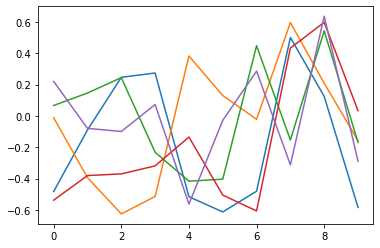

In [42]:
import matplotlib.pyplot as plt

plt.plot(w[0])